In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset --path datasets/   --unzip

train_path = '/content/datasets/Train/Train'
val_path = '/content/datasets/Validation/Validation'
test_path = '/content/datasets/Test/Test'

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.25G/1.25G [00:32<00:00, 40.8MB/s]
100% 1.25G/1.25G [00:32<00:00, 41.2MB/s]


In [ ]:
tf.__version__

'2.15.0'

In [ ]:
SIZE = 256

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(SIZE,SIZE),
                                                 batch_size = 20,
                                                 class_mode='categorical')

Found 1322 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (SIZE, SIZE),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 60 images belonging to 3 classes.


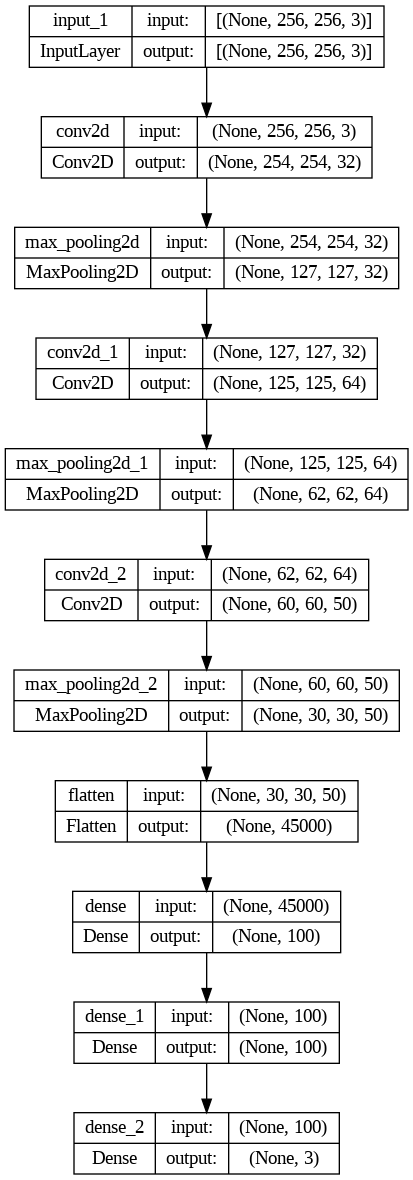

In [ ]:
from tensorflow.keras import layers, models
cnn = tf.keras.models.Sequential([layers.InputLayer(input_shape=[SIZE,SIZE, 3]),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),

    layers.Dense(3, activation='softmax'),])

from tensorflow.keras.utils import plot_model

plot_model(cnn, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 50)        28850     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 50)        0

In [ ]:
cnn.compile(optimizer = tf.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
67/67 [==============================] - 132s 2s/step - loss: 0.8172 - accuracy: 0.5855 - val_loss: 0.7584 - val_accuracy: 0.6333
Epoch 2/30
67/67 [==============================] - 111s 2s/step - loss: 0.4922 - accuracy: 0.8033 - val_loss: 0.4876 - val_accuracy: 0.8167
Epoch 3/30
67/67 [==============================] - 112s 2s/step - loss: 0.3317 - accuracy: 0.8880 - val_loss: 0.5699 - val_accuracy: 0.8833
Epoch 4/30
67/67 [==============================] - 109s 2s/step - loss: 0.3166 - accuracy: 0.9092 - val_loss: 0.4895 - val_accuracy: 0.8333
Epoch 5/30
67/67 [==============================] - 109s 2s/step - loss: 0.2521 - accuracy: 0.9092 - val_loss: 0.2740 - val_accuracy: 0.9167
Epoch 6/30
67/67 [==============================] - 103s 2s/step - loss: 0.2107 - accuracy: 0.9312 - val_loss: 0.3389 - val_accuracy: 0.9000
Epoch 7/30
67/67 [==============================] - 106s 2s/step - loss: 0.1548 - accuracy: 0.9508 - val_loss: 0.2068 - val_accuracy: 0.9333
Epoch 8/30
67

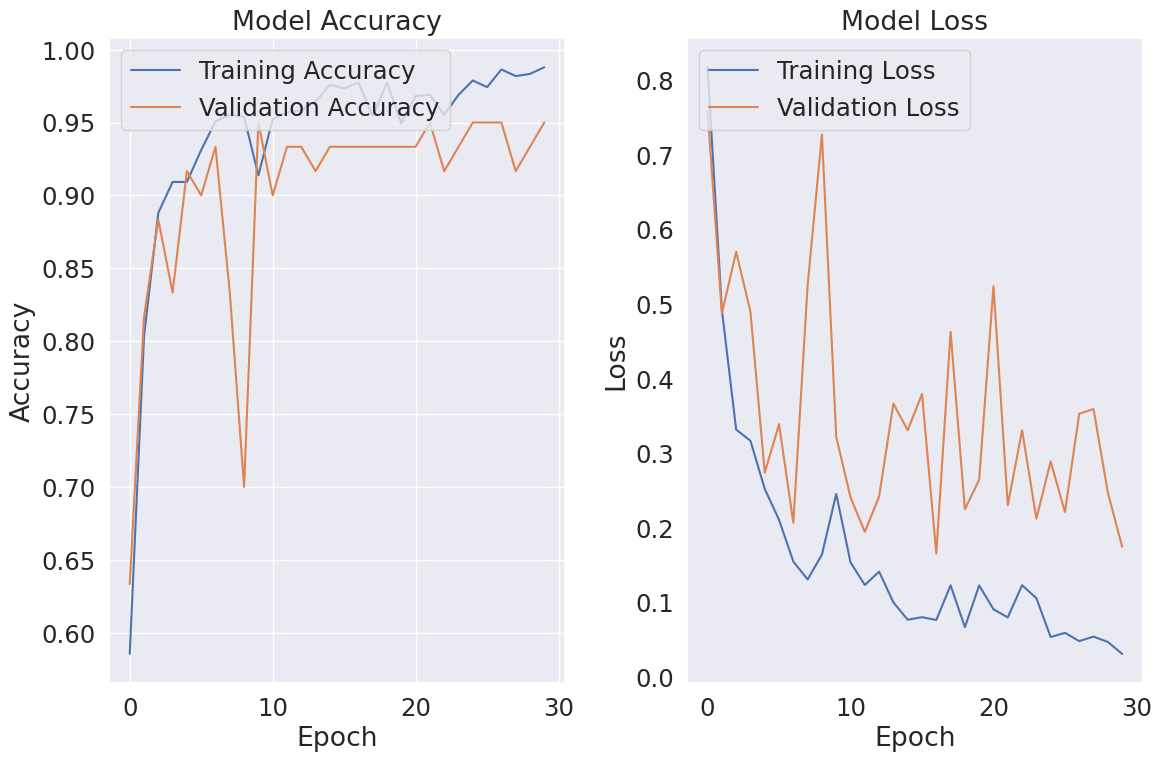

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
import numpy
import sklearn.metrics as metrics

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_path,
     target_size=(SIZE, SIZE),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 150 images belonging to 3 classes.


<ipython-input-13-b0e9fe9df82c>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


In [ ]:
predictions = cnn.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

5/5 [==============================] - 16s 3s/step


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [ ]:
class_map = {
    'Healthy': 0, 'Powdery': 1, 'Rust': 2
}

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

     Healthy       0.94      0.62      0.75        50
     Powdery       0.92      0.88      0.90        50
        Rust       0.70      0.96      0.81        50

    accuracy                           0.82       150
   macro avg       0.85      0.82      0.82       150
weighted avg       0.85      0.82      0.82       150



In [ ]:
confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
confusion_matrix

array([[31,  3, 16],
       [ 1, 44,  5],
       [ 1,  1, 48]])

In [ ]:
print(metrics.accuracy_score(true_classes, predicted_classes))

0.82


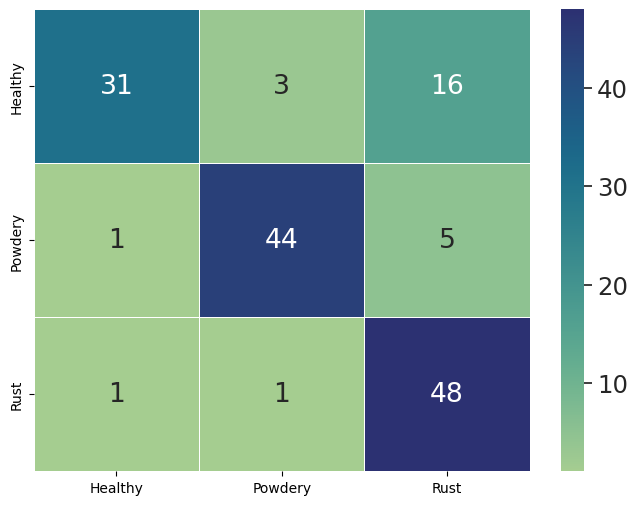

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(numpy.round(confusion_matrix), annot=True, linewidths=.5, ax=ax, cmap='crest', xticklabels=class_map, yticklabels=class_map)
plt.show()